Mean Squared Error: 11595.46
R-squared: 0.02


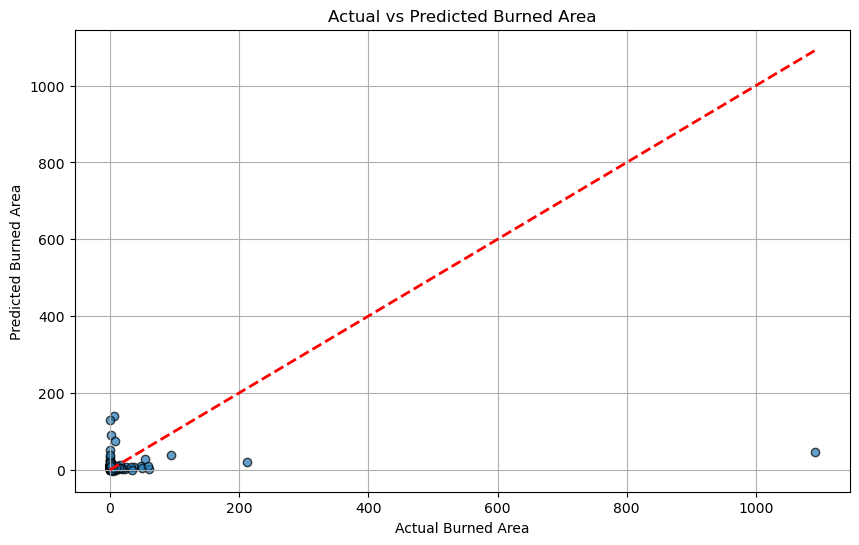

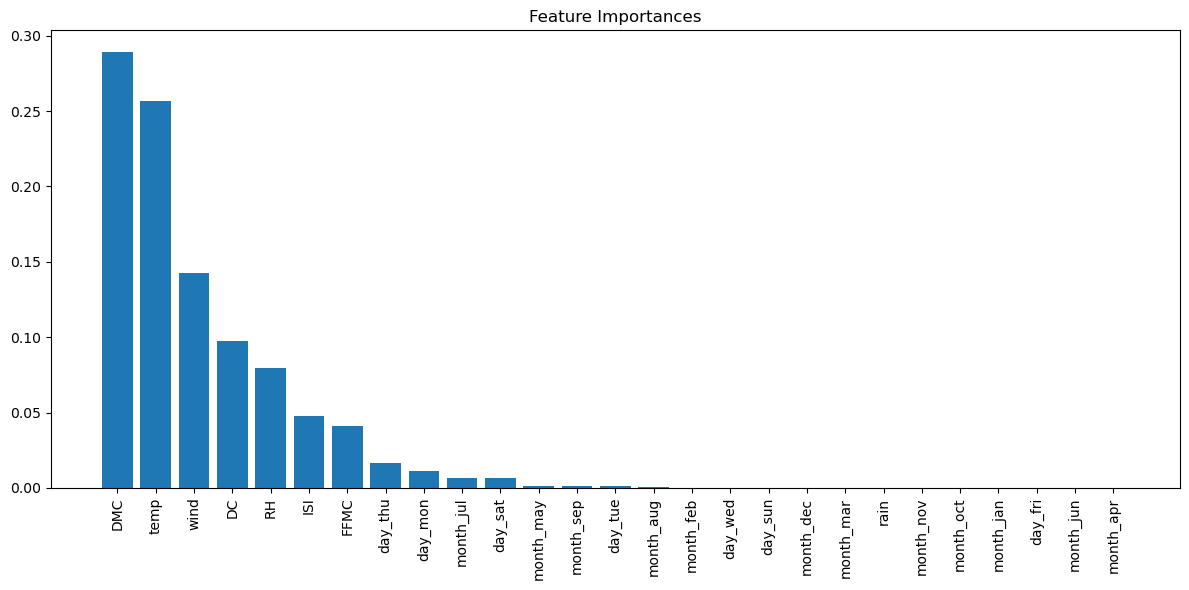

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load the dataset
file_path = 'forestfires.csv'
data = pd.read_csv(file_path)

# Preprocessing
# Separate features and target variable
target = 'area'
features = data.drop(columns=[target])
X = features
y = data[target]

# Identify categorical and numerical columns
categorical_cols = ['month', 'day']
numerical_cols = [col for col in X.columns if col not in categorical_cols + ['X', 'Y']]

# Preprocessing for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Define the model
model = GradientBoostingRegressor(random_state=42)

# Create and combine preprocessing and model in a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Save the trained model
joblib.dump(pipeline, 'trained_pipeline.pkl')

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Actual Burned Area')
plt.ylabel('Predicted Burned Area')
plt.title('Actual vs Predicted Burned Area')
plt.grid(True)
plt.show()

# Plot feature importances
feature_names = numerical_cols + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())
importances = pipeline.named_steps['model'].feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=90)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()
